# Quandl Quickstart

In [35]:
import quandl
import pandas as pd
import numpy as np

In [15]:
mydata = quandl.get('WIKI/AAPL')

In [16]:
mydata

,Open,High,Low,Close,Volume,Ex-Dividend,Split Ratio,Adj. Open,Adj. High,Adj. Low,Adj. Close,Adj. Volume
Date,,,,,,,,,,,,
1980-12-12,28.75,28.87,28.75,28.750,2093900.0,0.0,1.0,0.422706,0.424470,0.422706,0.422706,117258400.0
1980-12-15,27.38,27.38,27.25,27.250,785200.0,0.0,1.0,0.402563,0.402563,0.400652,0.400652,43971200.0
1980-12-16,25.37,25.37,25.25,25.250,472000.0,0.0,1.0,0.373010,0.373010,0.371246,0.371246,26432000.0
1980-12-17,25.87,26.00,25.87,25.870,385900.0,0.0,1.0,0.380362,0.382273,0.380362,0.380362,21610400.0
1980-12-18,26.63,26.75,26.63,26.630,327900.0,0.0,1.0,0.391536,0.393300,0.391536,0.391536,18362400.0
...,...,...,...,...,...,...,...,...,...,...,...,...
2018-03-21,175.04,175.09,171.26,171.270,35247358.0,0.0,1.0,175.040000,175.090000,171.260000,171.270000,35247358.0
2018-03-22,170.00,172.68,168.60,168.845,41051076.0,0.0,1.0,170.000000,172.680000,168.600000,168.845000,41051076.0
2018-03-23,168.39,169.92,164.94,164.940,40248954.0,0.0,1.0,168.390000,169.920000,164.940000,164.940000,40248954.0


In [17]:
import matplotlib.pyplot as plt
%matplotlib inline

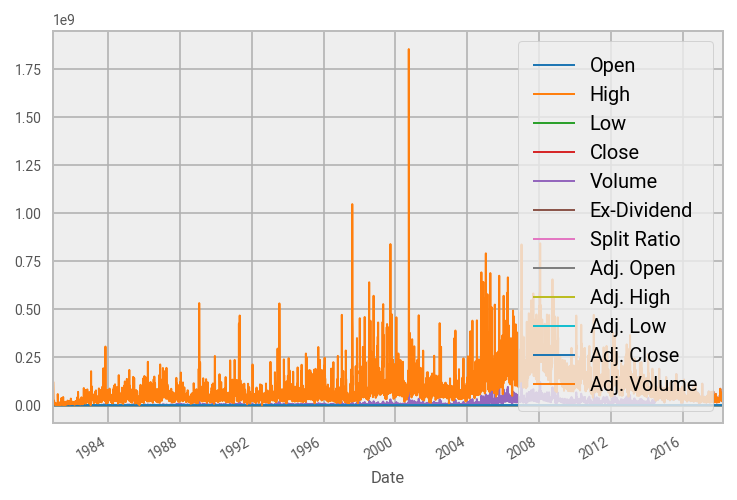

In [18]:
mydata.plot()

In [19]:
from datetime import datetime

In [20]:
year = 2019
month = 12
day = 2
hour = 4
minute = 3
second = 15

In [21]:
date = datetime(year,month,day)

In [22]:
date

datetime.datetime(2019, 12, 2, 0, 0)

In [24]:
date= datetime(year,month,day,hour,minute)

In [25]:
#Not just a string but a datetime.datetime object
#Has attributes you can grab from
date

datetime.datetime(2019, 12, 2, 4, 3)

In [27]:
date.month

12

In [28]:
date.day

2

In [30]:
twodates = [datetime(2016,1,2), datetime(2019,1,2)]

In [33]:
dt_ind = pd.DatetimeIndex(twodates)

In [34]:
dt_ind

DatetimeIndex(['2016-01-02', '2019-01-02'], dtype='datetime64[ns]', freq=None)

In [36]:
data = np.random.randn(2,2)

In [37]:
data

array([[ 0.25598488, -0.15659026],
       [-1.57439458, -0.57281006]])

In [38]:
cols = ['1','b']

In [39]:
df = pd.DataFrame(data, dt_ind, cols)

In [40]:
#notice index is a datetime index
df

,1,b
2016-01-02,0.255985,-0.15659
2019-01-02,-1.574395,-0.57281


In [41]:
df.index.all

<bound method make_invalid_op.<locals>.invalid_op of DatetimeIndex(['2016-01-02', '2019-01-02'], dtype='datetime64[ns]', freq=None)>

In [42]:
df.index.argmin

<bound method DatetimeIndexOpsMixin.argmin of DatetimeIndex(['2016-01-02', '2019-01-02'], dtype='datetime64[ns]', freq=None)>

In [43]:
df.index.argsort

<bound method Index.argsort of DatetimeIndex(['2016-01-02', '2019-01-02'], dtype='datetime64[ns]', freq=None)>

Time Resampling

In [44]:
#Pandas has frequency sampling tools that go beyond groupby functionality

In [46]:
#Acting as group by method specific to time series
df.resample(rule='A')

In [48]:
#mean value based off resampling at the end of year
df.resample(rule='A').mean()

,1,b
2016-12-31,0.255985,-0.15659
2017-12-31,NaN,NaN
2018-12-31,NaN,NaN
2019-12-31,-1.574395,-0.57281


In [49]:
df.resample(rule='Q').mean() #quarters

,1,b
2016-03-31,0.255985,-0.15659
2016-06-30,NaN,NaN
2016-09-30,NaN,NaN
2016-12-31,NaN,NaN
2017-03-31,NaN,NaN
2017-06-30,NaN,NaN
2017-09-30,NaN,NaN
2017-12-31,NaN,NaN
2018-03-31,NaN,NaN
2018-06-30,NaN,NaN


In [50]:
df.resample(rule='BQ').mean() #business quarters

,1,b
2016-03-31,0.255985,-0.15659
2016-06-30,NaN,NaN
2016-09-30,NaN,NaN
2016-12-30,NaN,NaN
2017-03-31,NaN,NaN
2017-06-30,NaN,NaN
2017-09-29,NaN,NaN
2017-12-29,NaN,NaN
2018-03-30,NaN,NaN
2018-06-29,NaN,NaN


In [51]:
df.resample(rule='A').max()

,1,b
2016-12-31,0.255985,-0.15659
2017-12-31,NaN,NaN
2018-12-31,NaN,NaN
2019-12-31,-1.574395,-0.57281


In [52]:
def first_date(entry):
    return entry[0]

In [53]:
df.resample(rule='A').apply(first_date)

KeyError: 0

In [54]:
df.index

DatetimeIndex(['2016-01-02', '2019-01-02'], dtype='datetime64[ns]', freq=None)

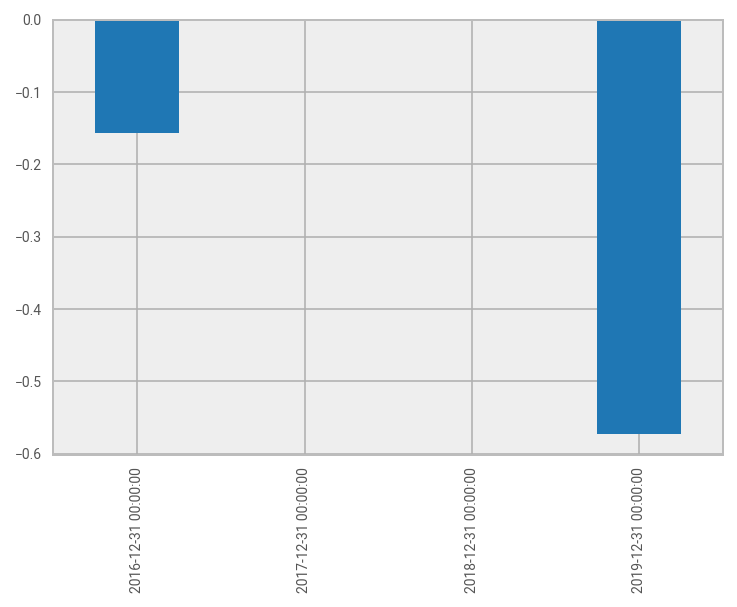

In [55]:
df['b'].resample('A').mean().plot(kind='bar')

Shifting Datasets

In [56]:
df

,1,b
2016-01-02,0.255985,-0.15659
2019-01-02,-1.574395,-0.57281


In [57]:
df.index.name = 'Date'

In [58]:
df

,1,b
Date,,
2016-01-02,0.255985,-0.15659
2019-01-02,-1.574395,-0.57281


In [59]:
df.shift(periods=1)

,1,b
Date,,
2016-01-02,NaN,NaN
2019-01-02,0.255985,-0.15659


In [60]:
df.shift(periods=-1)

,1,b
Date,,
2016-01-02,-1.574395,-0.57281
2019-01-02,NaN,NaN


In [61]:
#tshift shifts all particular rows to the time string code you provided

In [62]:
df.tshift(freq='M')

,1,b
Date,,
2016-01-31,0.255985,-0.15659
2019-01-31,-1.574395,-0.57281


In [63]:
#shifting everything to the month